In [328]:
import random
import matplotlib.pyplot as plt
import numpy as np

n = 20
nHist = 1000

# The Odds of Wingspan
## Gambling Birds

With the introduction of the Asia Expansion in Wingspan there were 4 similar birds released. Each time I find one of them I wonder… "is it worth risking it for 3 points?". I am going to show what stopping at 1 roll, 2 rolls, and 3 rolls with both a simulation and with statistics.

Each bird has the option to roll a number of dice up to 3 times, going until one of 3; I hit 3, I decide to stop, or I miss on my roll.
Wingspan's dice have 6 sides; 1 rat, 1 fish, 1 berry, 1 worm, 1 wheat, and 1 worm/wheat. This means that worms and wheat are twice as likely as all other foods. Of course this is taken into account for the game as most birds have one or both of worms and wheat, and if they do not they are often worth more points.

![Worm](images/worm.png) ![Wheat](images/wheat.png) ![WormWheat](images/wheatworm.png) ![Fish](images/fish.png) ![Berry](images/berry.png) ![Rat](images/rat.png)

To simulate these birds it is as simple as getting a random number (1-6) to simulate the die and then deciding if the roll hit. This will be done multiple times as I want to compare rolling once, twice, and three times. All of this will be done a number of times to simulate each turn it is triggered.

## White-Throated Kingfisher
![White-Throated Kingfisher](https://cdn.discordapp.com/attachments/271774119047987204/1318491562950393896/image.png?ex=67628474&is=676132f4&hm=9829151a047e7969109f4c9dbfde42238d16cc36ed0b561b7effa0d53e5d1eb1&)

The White-Throated Kingfisher has the text "WHEN ACTIVATED: Choose any 1 die. Roll it up to 3 times. Each time, if you roll a worm, fish, or rat, cache 1 here. If not stop and return all food cached here this turn." This means it can net me anywhere from 0 to 3 points each turn. The odds of finding one of those foods on a die is 4 out of 6.

Calculating the expected value or expected points of a card is done with fancy stats (it is not fancy at all). I take the odds of rolling once, twice, or three times, then multiply by the amount of points I would receive from that. This is essentially taking the odds that you succeed your rolls and multiply it by how many points received. Now is this calculation correct? (yes) I will show later how it is correct.

The variance graphs show what range the points can end at. The occurrence graphs show the distribution on where the point values lie. These graphs go up by 1, 2, or 3 depending on how many rolls they are displaying. This shows me that One Roll has the most consistent spread and Three Rolls has the least consistent spread. Since Two Rolls and Three Rolls have the same expected points which one that is done depends on if the safer option of 2 points or the high roll of 3 points is more worth it. So if you ever play the White-Throated Kingfisher either is fine, just don't be scared and do One Roll.

In [329]:
means = []
sumOneRoll = 0
sumTwoRoll = 0
sumThreeRoll = 0
pointsPerTurn = []

for j in range(0, n):
    randomNum = random.randint(1,6)
    ppt1 = 0
    if randomNum < 5:
        sumOneRoll += 1
        ppt1 = 1

    randomNum = random.randint(1,6)
    ppt2 = 0
    if randomNum < 5:
        randomNum = random.randint(1,6)
        if randomNum < 5:
            sumTwoRoll += 2
            ppt2 = 2

    randomNum = random.randint(1,6)
    ppt3 = 0
    if randomNum < 5:
        randomNum = random.randint(1,6)
        if randomNum < 5:
            randomNum = random.randint(1,6)
            if randomNum < 5:
                sumThreeRoll += 3
                ppt3 = 3

    pointsPerTurn.append({
        'ppt1': ppt1,
        'ppt2': ppt2,
        'ppt3': ppt3
    })


means.append({
    'sumOneRoll': sumOneRoll / n,
    'sumTwoRoll': sumTwoRoll / n,
    'sumThreeRoll': sumThreeRoll / n
})

print(means)

[{'sumOneRoll': 0.6, 'sumTwoRoll': 1.2, 'sumThreeRoll': 1.05}]


## One Roll
$$\left(\frac{4}{6}\right) \times \text{1 point} = 0.66 \text{ expected points}$$

## Two Rolls
$$\left(\frac{4}{6}\right)^2 \times \text{2 points} = 0.88 \text{ expected points}$$

## Three Rolls
$$\left(\frac{4}{6}\right)^3 \times \text{3 points} = 0.88 \text{ expected points}$$

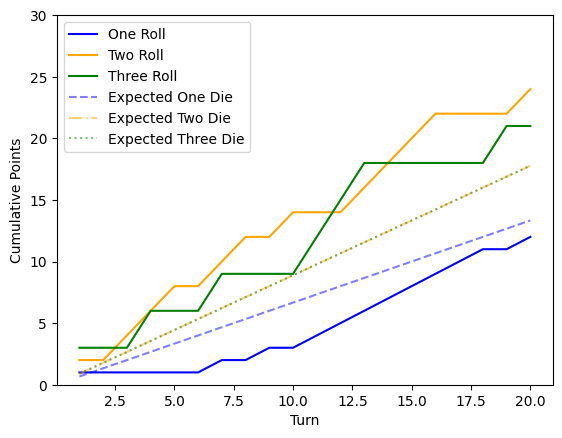

In [330]:
# Convert list of dictionaries to a NumPy array for efficient operations
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate cumulative sums
cumsum_ppt1 = np.cumsum(ppt1)
cumsum_ppt2 = np.cumsum(ppt2)
cumsum_ppt3 = np.cumsum(ppt3)

# Expected values
WTKexpected_value_one_roll = (4/6)
WTKexpected_value_two_rolls = (4/6)**2*2
WTKexpected_value_three_rolls = (4/6)**3*3

# Generate x values
x = np.arange(1, len(pointsPerTurn) + 1)

# Plot the data
plt.plot(x, cumsum_ppt1, label='One Roll', color='blue')
plt.plot(x, cumsum_ppt2, label='Two Roll', color='orange')
plt.plot(x, cumsum_ppt3, label='Three Roll', color='green')

plt.plot(x, WTKexpected_value_one_roll * x, 'blue', linestyle='--', label='Expected One Die', alpha=0.5)
plt.plot(x, WTKexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Die', alpha=0.5)
plt.plot(x, WTKexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Die', alpha=0.5)

# Set y-axis limit to n * 1.5
plt.ylim(0, n * 1.5)

plt.xlabel('Turn')
plt.ylabel('Cumulative Points')
plt.legend()
plt.show()

| Number of Rolls | Expected Points | Observed Points |
|--|--|--|
| One Roll | 0.66 | 0.6 |
| Two Rolls | 0.88 | 1.2 |
| Three Rolls | 0.88 | 1.05 |

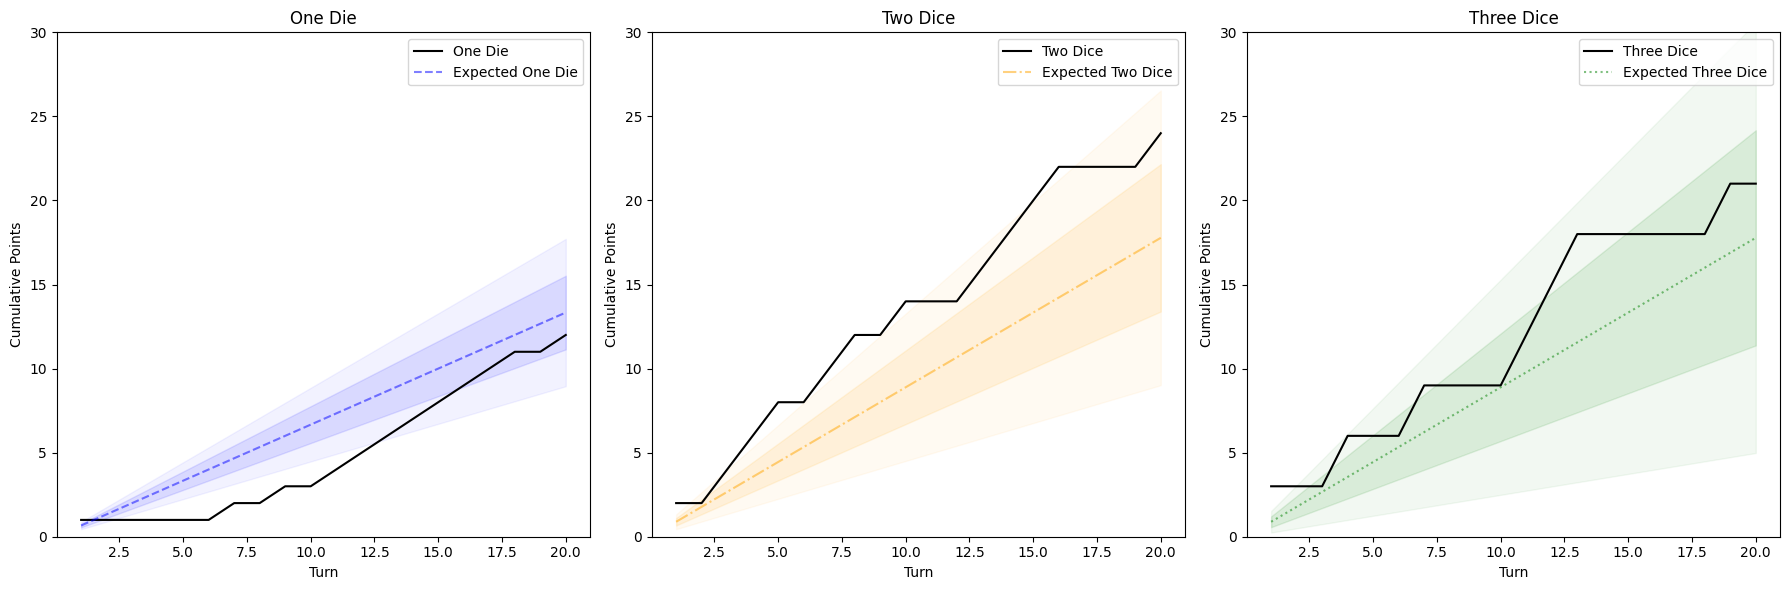

In [331]:
# Extract the values for ppt1, ppt2, and ppt3
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate the mean
mean_ppt1 = np.mean(ppt1)
mean_ppt2 = np.mean(ppt2)
mean_ppt3 = np.mean(ppt3)

# Calculate the variance
variance_ppt1 = np.mean((ppt1 - mean_ppt1) ** 2)
variance_ppt2 = np.mean((ppt2 - mean_ppt2) ** 2)
variance_ppt3 = np.mean((ppt3 - mean_ppt3) ** 2)

# Calculate the standard deviation
std_dev_ppt1 = np.sqrt(variance_ppt1)
std_dev_ppt2 = np.sqrt(variance_ppt2)
std_dev_ppt3 = np.sqrt(variance_ppt3)

# Calculate the standard error of the mean
sem_ppt1 = std_dev_ppt1 / np.sqrt(n)
sem_ppt2 = std_dev_ppt2 / np.sqrt(n)
sem_ppt3 = std_dev_ppt3 / np.sqrt(n)

# Generate x values
x = np.arange(1, n + 1)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for One Die
axs[0].plot(x, np.cumsum(ppt1), label='One Die', color='black')
axs[0].plot(x, WTKexpected_value_one_roll * x, 'b--', label='Expected One Die', alpha=0.5)
axs[0].fill_between(x, np.maximum((WTKexpected_value_one_roll - sem_ppt1) * x, 0), (WTKexpected_value_one_roll + sem_ppt1) * x, color='blue', alpha=0.1)
axs[0].fill_between(x, np.maximum((WTKexpected_value_one_roll - 2 * sem_ppt1) * x, 0), (WTKexpected_value_one_roll + 2 * sem_ppt1) * x, color='blue', alpha=0.05)
axs[0].set_ylim(0, n * 1.5)
axs[0].set_xlabel('Turn')
axs[0].set_ylabel('Cumulative Points')
axs[0].legend()
axs[0].set_title('One Die')

# Plot for Two Dice
axs[1].plot(x, np.cumsum(ppt2), label='Two Dice', color='black')
axs[1].plot(x, WTKexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Dice', alpha=0.5)
axs[1].fill_between(x, np.maximum((WTKexpected_value_two_rolls - sem_ppt2) * x, 0), (WTKexpected_value_two_rolls + sem_ppt2) * x, color='orange', alpha=0.1)
axs[1].fill_between(x, np.maximum((WTKexpected_value_two_rolls - 2 * sem_ppt2) * x, 0), (WTKexpected_value_two_rolls + 2 * sem_ppt2) * x, color='orange', alpha=0.05)
axs[1].set_ylim(0, n * 1.5)
axs[1].set_xlabel('Turn')
axs[1].set_ylabel('Cumulative Points')
axs[1].legend()
axs[1].set_title('Two Dice')

# Plot for Three Dice
axs[2].plot(x, np.cumsum(ppt3), label='Three Dice', color='black')
axs[2].plot(x, WTKexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Dice', alpha=0.5)
axs[2].fill_between(x, np.maximum((WTKexpected_value_three_rolls - sem_ppt3) * x, 0), (WTKexpected_value_three_rolls + sem_ppt3) * x, color='green', alpha=0.1)
axs[2].fill_between(x, np.maximum((WTKexpected_value_three_rolls - 2 * sem_ppt3) * x, 0), (WTKexpected_value_three_rolls + 2 * sem_ppt3) * x, color='green', alpha=0.05)
axs[2].set_ylim(0, n * 1.5)
axs[2].set_xlabel('Turn')
axs[2].set_ylabel('Cumulative Points')
axs[2].legend()
axs[2].set_title('Three Dice')

plt.tight_layout()
plt.show()

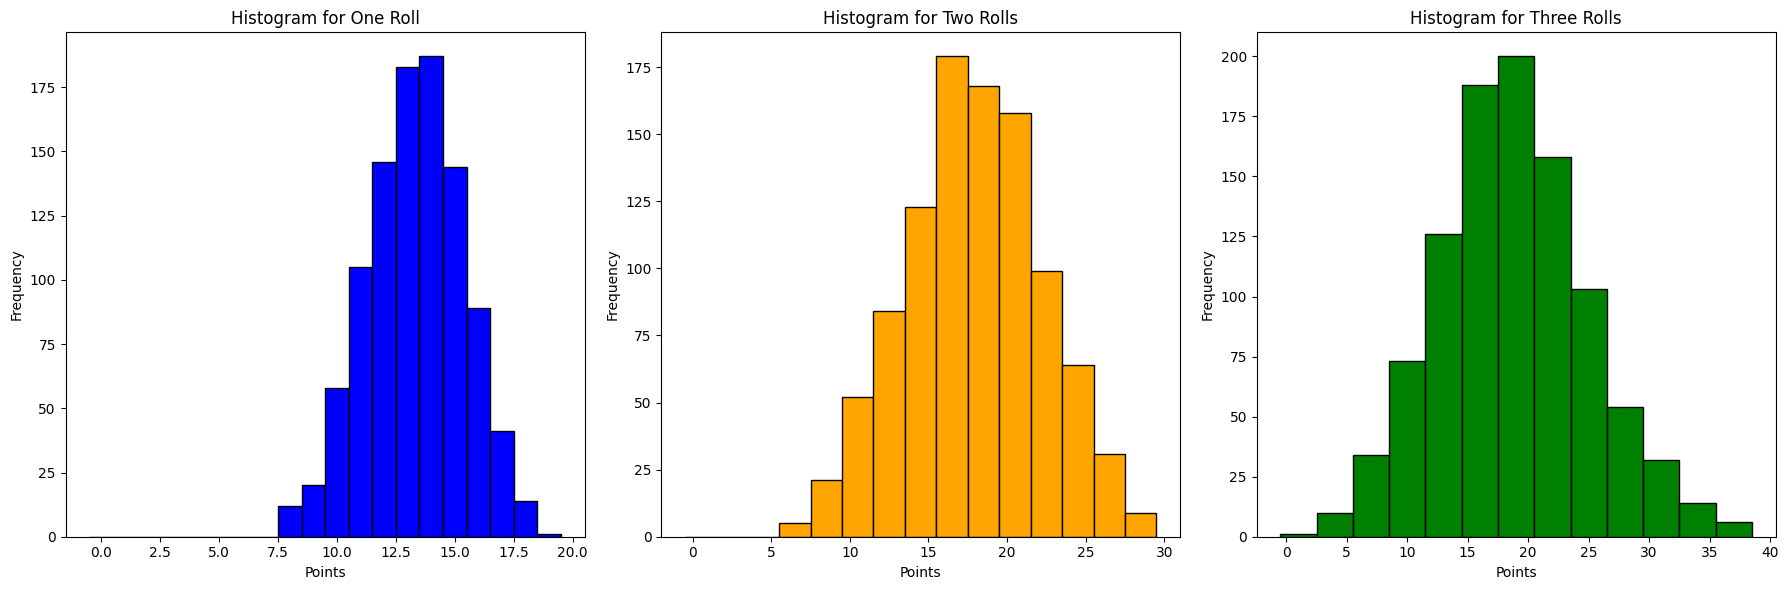

In [332]:
pptArr = []
for i in range(0, nHist):
    means = []
    sumOneRoll = 0
    sumTwoRoll = 0
    sumThreeRoll = 0
    pointsPerTurn = []
    for j in range(0, n):
        randomNum = random.randint(1,6)
        ppt1 = 0
        if randomNum < 5:
            sumOneRoll += 1
            ppt1 = 1

        randomNum = random.randint(1,6)
        ppt2 = 0
        if randomNum < 5:
            randomNum = random.randint(1,6)
            if randomNum < 5:
                sumTwoRoll += 2
                ppt2 = 2

        randomNum = random.randint(1,6)
        ppt3 = 0
        if randomNum < 5:
            randomNum = random.randint(1,6)
            if randomNum < 5:
                randomNum = random.randint(1,6)
                if randomNum < 5:
                    sumThreeRoll += 3
                    ppt3 = 3

    pptArr.append({
        'sumOneRoll': sumOneRoll,
        'sumTwoRoll': sumTwoRoll,
        'sumThreeRoll': sumThreeRoll
    })

# Extract the sums for each roll
sumOneRolls = [p['sumOneRoll'] for p in pptArr]
sumTwoRolls = [p['sumTwoRoll'] for p in pptArr]
sumThreeRolls = [p['sumThreeRoll'] for p in pptArr]

# Create histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for One Roll
axs[0].hist(sumOneRolls, bins=np.arange(-0.5, max(sumOneRolls) + 1.5, 1), edgecolor='black', align='mid', color='blue')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for One Roll')

# Histogram for Two Rolls
axs[1].hist(sumTwoRolls, bins=np.arange(-0.5, max(sumTwoRolls) + 1.5, 2), edgecolor='black', align='mid', color='orange')
axs[1].set_xlabel('Points')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for Two Rolls')

# Histogram for Three Rolls
axs[2].hist(sumThreeRolls, bins=np.arange(-0.5, max(sumThreeRolls) + 1.5, 3), edgecolor='black', align='mid', color='green')
axs[2].set_xlabel('Points')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram for Three Rolls')

plt.tight_layout()
plt.show()

## Brahminy Kite
![Brahminy Kite](https://cdn.discordapp.com/attachments/551174213663326254/1318485398766489631/image.png?ex=67627eb7&is=67612d37&hm=75dee7858e5d47eaded3d9785bb6afcbd4cfc74a2f9c4b6bb072c5fcad37c5c9&)

The Brahminy Kite has the text "WHEN ACTIVATED: Choose any 3 dice. Roll them up to 3 times. Each time, if you roll at least 1 fish or rat, cache 1 here. If not stop and return all food cached here this turn." This means it can net me anywhere from 0 to 3 points each turn. The odds of finding one of those foods on a die is 2 out of 6 but this time you get 3 opportunities.

The Brahminy Kite is different than the White-Throated Kingfisher in expected points in that Two Rolls and Three Rolls are now different. Three Rolls now is expected to return over 1 point!

In the simulated turns I see that One Roll followed the expected path fairly closely. This makes sense since One Roll is the most consistent. Two Rolls and Three Rolls however did not follow their expected path. Two Rolls took an early lead but Three Rolls quickly exploded to catch up. At the end of the race the winner was… a tie with 24!

Here we can see how usually the lines stay in their dark areas. Two Rolls strayed but then came back. Three Rolls is best option there is for the Brahminy Kite but Two Rolls is acceptable for the faint of heart with about 0.05 expected points less.

In [333]:
means = []
sumOneRoll = 0
sumTwoRoll = 0
sumThreeRoll = 0
pointsPerTurn = []

for j in range(0, n):
    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    randomNum3 = random.randint(1,6)
    ppt1 = 0
    if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
        sumOneRoll += 1
        ppt1 = 1

    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    randomNum3 = random.randint(1,6)
    ppt2 = 0
    if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            sumTwoRoll += 2
            ppt2 = 2

    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    randomNum3 = random.randint(1,6)
    ppt3 = 0
    if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            randomNum3 = random.randint(1,6)
            if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                sumThreeRoll += 3
                ppt3 = 3

    pointsPerTurn.append({
        'ppt1': ppt1,
        'ppt2': ppt2,
        'ppt3': ppt3
    })

means.append({
    'sumOneRoll': sumOneRoll / n,
    'sumTwoRoll': sumTwoRoll / n,
    'sumThreeRoll': sumThreeRoll / n
})

print(means)

[{'sumOneRoll': 0.75, 'sumTwoRoll': 1.2, 'sumThreeRoll': 1.2}]


## One Roll
$$\left(\frac{2}{6}+\frac{4}{6}\times\frac{2}{6}+\frac{4}{6}\times\frac{4}{6}\times\frac{2}{6}\right) = 0.703 \text{ expected points}$$

## Two Rolls
$$\left(\frac{2}{6}+\frac{4}{6}\times\frac{2}{6}+\frac{4}{6}\times\frac{4}{6}\times\frac{2}{6}\right)^{2}\times2 = 0.99 \text{ expected points}$$

## Three Rolls
$$\left(\frac{2}{6}+\frac{4}{6}\times\frac{2}{6}+\frac{4}{6}\times\frac{4}{6}\times\frac{2}{6}\right)^{3}\times3 = 1.045 \text{ expected points}$$


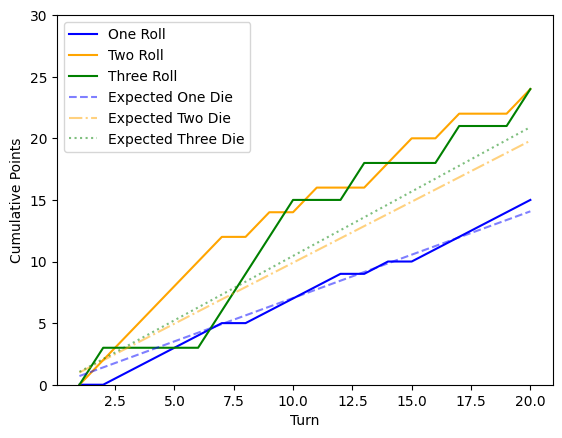

In [334]:
# Convert list of dictionaries to a NumPy array for efficient operations
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate cumulative sums
cumsum_ppt1 = np.cumsum(ppt1)
cumsum_ppt2 = np.cumsum(ppt2)
cumsum_ppt3 = np.cumsum(ppt3)

# Expected values
BKexpected_value_one_roll = (2/6+4/6*2/6+4/6*4/6*2/6)
BKexpected_value_two_rolls = (2/6+4/6*2/6+4/6*4/6*2/6)**2*2
BKexpected_value_three_rolls = (2/6+4/6*2/6+4/6*4/6*2/6)**3*3

# Generate x values
x = np.arange(1, len(pointsPerTurn) + 1)

# Plot the data
plt.plot(x, cumsum_ppt1, label='One Roll', color='blue')
plt.plot(x, cumsum_ppt2, label='Two Roll', color='orange')
plt.plot(x, cumsum_ppt3, label='Three Roll', color='green')

plt.plot(x, BKexpected_value_one_roll * x, 'blue', linestyle='--', label='Expected One Die', alpha=0.5)
plt.plot(x, BKexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Die', alpha=0.5)
plt.plot(x, BKexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Die', alpha=0.5)

plt.ylim(0, n * 1.5)
plt.xlabel('Turn')
plt.ylabel('Cumulative Points')
plt.legend()
plt.show()

| Number of Rolls | Expected Points | Observed Points |
|--|--|--|
| One Roll | 0.703 | 0.75 |
| Two Rolls | 0.99 | 1.2 |
| Three Rolls | 1.045 | 1.2 |

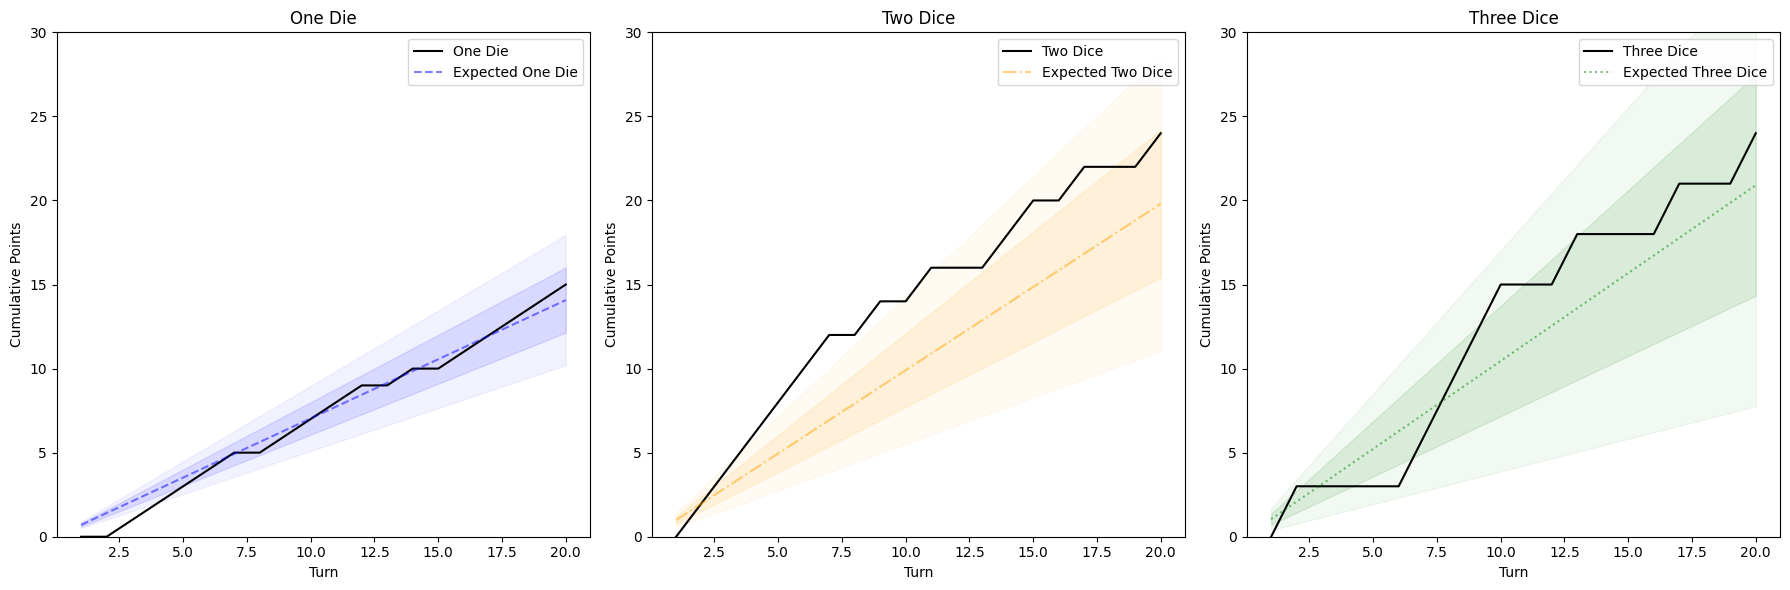

In [335]:
# Extract the values for ppt1, ppt2, and ppt3
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate the mean
mean_ppt1 = np.mean(ppt1)
mean_ppt2 = np.mean(ppt2)
mean_ppt3 = np.mean(ppt3)

# Calculate the variance
variance_ppt1 = np.mean((ppt1 - mean_ppt1) ** 2)
variance_ppt2 = np.mean((ppt2 - mean_ppt2) ** 2)
variance_ppt3 = np.mean((ppt3 - mean_ppt3) ** 2)

# Calculate the standard deviation
std_dev_ppt1 = np.sqrt(variance_ppt1)
std_dev_ppt2 = np.sqrt(variance_ppt2)
std_dev_ppt3 = np.sqrt(variance_ppt3)

# Calculate the standard error of the mean
sem_ppt1 = std_dev_ppt1 / np.sqrt(n)
sem_ppt2 = std_dev_ppt2 / np.sqrt(n)
sem_ppt3 = std_dev_ppt3 / np.sqrt(n)

# Generate x values
x = np.arange(1, n + 1)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for One Die
axs[0].plot(x, np.cumsum(ppt1), label='One Die', color='black')
axs[0].plot(x, BKexpected_value_one_roll * x, 'b--', label='Expected One Die', alpha=0.5)
axs[0].fill_between(x, np.maximum((BKexpected_value_one_roll - sem_ppt1) * x, 0), (BKexpected_value_one_roll + sem_ppt1) * x, color='blue', alpha=0.1)
axs[0].fill_between(x, np.maximum((BKexpected_value_one_roll - 2 * sem_ppt1) * x, 0), (BKexpected_value_one_roll + 2 * sem_ppt1) * x, color='blue', alpha=0.05)
axs[0].set_ylim(0, n * 1.5)
axs[0].set_xlabel('Turn')
axs[0].set_ylabel('Cumulative Points')
axs[0].legend()
axs[0].set_title('One Die')

# Plot for Two Dice
axs[1].plot(x, np.cumsum(ppt2), label='Two Dice', color='black')
axs[1].plot(x, BKexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Dice', alpha=0.5)
axs[1].fill_between(x, np.maximum((BKexpected_value_two_rolls - sem_ppt2) * x, 0), (BKexpected_value_two_rolls + sem_ppt2) * x, color='orange', alpha=0.1)
axs[1].fill_between(x, np.maximum((BKexpected_value_two_rolls - 2 * sem_ppt2) * x, 0), (BKexpected_value_two_rolls + 2 * sem_ppt2) * x, color='orange', alpha=0.05)
axs[1].set_ylim(0, n * 1.5)
axs[1].set_xlabel('Turn')
axs[1].set_ylabel('Cumulative Points')
axs[1].legend()
axs[1].set_title('Two Dice')

# Plot for Three Dice
axs[2].plot(x, np.cumsum(ppt3), label='Three Dice', color='black')
axs[2].plot(x, BKexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Dice', alpha=0.5)
axs[2].fill_between(x, np.maximum((BKexpected_value_three_rolls - sem_ppt3) * x, 0), (BKexpected_value_three_rolls + sem_ppt3) * x, color='green', alpha=0.1)
axs[2].fill_between(x, np.maximum((BKexpected_value_three_rolls - 2 * sem_ppt3) * x, 0), (BKexpected_value_three_rolls + 2 * sem_ppt3) * x, color='green', alpha=0.05)
axs[2].set_ylim(0, n * 1.5)
axs[2].set_xlabel('Turn')
axs[2].set_ylabel('Cumulative Points')
axs[2].legend()
axs[2].set_title('Three Dice')

plt.tight_layout()
plt.show()

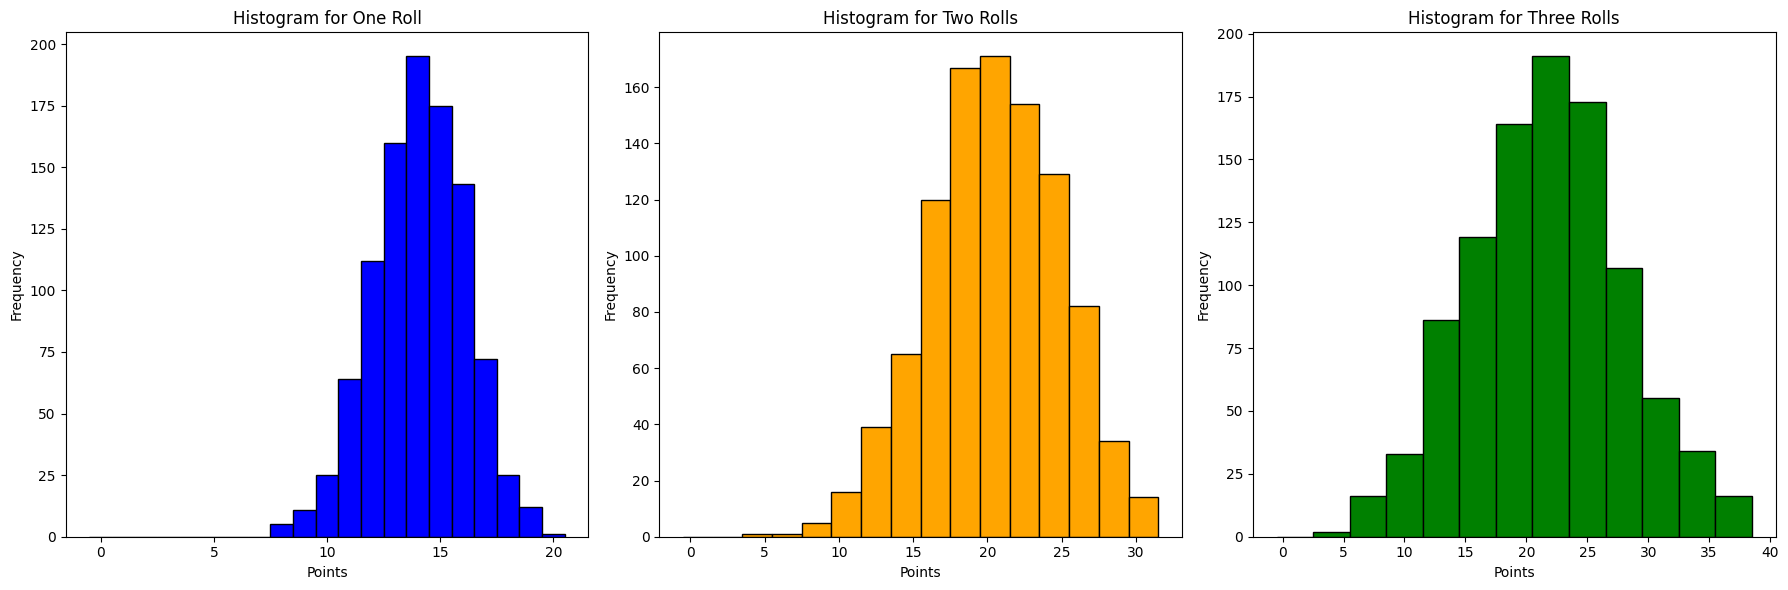

In [336]:
pptArr = []
for i in range(0, nHist):
    means = []
    sumOneRoll = 0
    sumTwoRoll = 0
    sumThreeRoll = 0
    pointsPerTurn = []
    for j in range(0, n):
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        ppt1 = 0
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            sumOneRoll += 1
            ppt1 = 1

        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        ppt2 = 0
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            randomNum3 = random.randint(1,6)
            if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                sumTwoRoll += 2
                ppt2 = 2

        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        ppt3 = 0
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            randomNum3 = random.randint(1,6)
            if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                randomNum1 = random.randint(1,6)
                randomNum2 = random.randint(1,6)
                randomNum3 = random.randint(1,6)
                if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                    sumThreeRoll += 3
                    ppt3 = 3

    pptArr.append({
        'sumOneRoll': sumOneRoll,
        'sumTwoRoll': sumTwoRoll,
        'sumThreeRoll': sumThreeRoll
    })

# Extract the sums for each roll
sumOneRolls = [p['sumOneRoll'] for p in pptArr]
sumTwoRolls = [p['sumTwoRoll'] for p in pptArr]
sumThreeRolls = [p['sumThreeRoll'] for p in pptArr]

# Create histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for One Roll
axs[0].hist(sumOneRolls, bins=np.arange(-0.5, max(sumOneRolls) + 1.5, 1), edgecolor='black', align='mid', color='blue')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for One Roll')

# Histogram for Two Rolls
axs[1].hist(sumTwoRolls, bins=np.arange(-0.5, max(sumTwoRolls) + 1.5, 2), edgecolor='black', align='mid', color='orange')
axs[1].set_xlabel('Points')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for Two Rolls')

# Histogram for Three Rolls
axs[2].hist(sumThreeRolls, bins=np.arange(-0.5, max(sumThreeRolls) + 1.5, 3), edgecolor='black', align='mid', color='green')
axs[2].set_xlabel('Points')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram for Three Rolls')

plt.tight_layout()
plt.show()

## Forest Owlet and Purple Hero
![Forest Owlet](https://cdn.discordapp.com/attachments/551174213663326254/1318488986431258646/image.png?ex=6762820e&is=6761308e&hm=c98b73891d394df5fbb23780acd7e36da422456a2f702fa9e91d85bf45e6009b&) ![Purple Heron](https://cdn.discordapp.com/attachments/271774119047987204/1318492150190837801/image.png?ex=67628501&is=67613381&hm=35ef8798c96e3af65d7aeb2e3cdf44742bc3bde893ce6a277762aa405ccf0ae7&)

The Forest Owlet and Purple Heron have the text "WHEN ACTIVATED: Choose any 2 dice. Roll them up to 3 times. Each time, if you roll a worm or rat/fish, cache 1 here. If not stop and return all food cached here this turn." This means it can net me anywhere from 0 to 3 points each turn. The odds of finding one of those foods on a die is 3out of 6 but this time you get 2 opportunities.

In this simulated turns One Roll is again the lowest performer. This is no surprise by this point but is worth a note. Two Rolls came out on top this time with some unlucky rolls by Three Rolls.

For the Forest Owlet and Purple Heron Three Rolls is the best option with an expected points of 1.265.

In [337]:
means = []
sumOneRoll = 0
sumTwoRoll = 0
sumThreeRoll = 0
pointsPerTurn = []

for j in range(0, n):
    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    ppt1 = 0
    if randomNum1 < 4 or randomNum2 < 4:
        sumOneRoll += 1
        ppt1 = 1

    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    ppt2 = 0
    if randomNum1 < 4 or randomNum2 < 4:
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        if randomNum1 < 4 or randomNum2 < 4:
            sumTwoRoll += 2
            ppt2 = 2

    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    ppt3 = 0
    if randomNum1 < 4 or randomNum2 < 4:
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        if randomNum1 < 4 or randomNum2 < 4:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            if randomNum1 < 4 or randomNum2 < 4:
                sumThreeRoll += 3
                ppt3 = 3

    pointsPerTurn.append({
        'ppt1': ppt1,
        'ppt2': ppt2,
        'ppt3': ppt3
    })

means.append({
    'sumOneRoll': sumOneRoll / n,
    'sumTwoRoll': sumTwoRoll / n,
    'sumThreeRoll': sumThreeRoll / n
})

print(means)

[{'sumOneRoll': 0.9, 'sumTwoRoll': 1.3, 'sumThreeRoll': 1.2}]


## One Roll
$$\left(\frac{3}{6} + \frac{3}{6} \times \frac{3}{6}\right) \times \text{1 point} = 0.75 \text{ expected points}$$

## Two Rolls
$$\left(\frac{3}{6} + \frac{3}{6} \times \frac{3}{6}\right)^2 \times \text{2 points} = 1.125 \text{ expected points}$$

## Three Rolls
$$\left(\frac{3}{6} + \frac{3}{6} \times \frac{3}{6}\right)^3 \times \text{3 points} = 1.265 \text{ expected points}$$


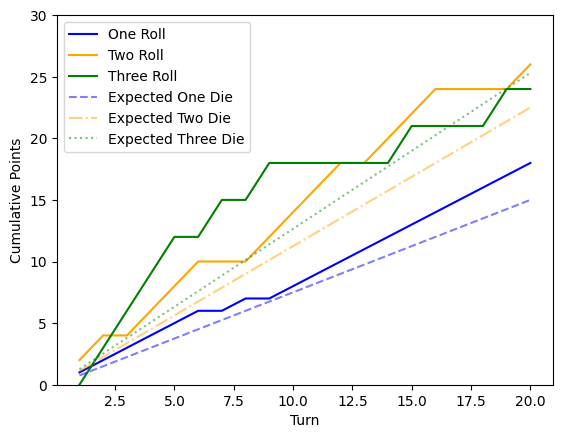

In [338]:
# Convert list of dictionaries to a NumPy array for efficient operations
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate cumulative sums
cumsum_ppt1 = np.cumsum(ppt1)
cumsum_ppt2 = np.cumsum(ppt2)
cumsum_ppt3 = np.cumsum(ppt3)

# Expected values
FOPHexpected_value_one_roll = (3/6+3/6*3/6)
FOPHexpected_value_two_rolls = (3/6+3/6*3/6)**2*2
FOPHexpected_value_three_rolls = (3/6+3/6*3/6)**3*3

# Generate x values
x = np.arange(1, len(pointsPerTurn) + 1)

# Plot the data
plt.plot(x, cumsum_ppt1, label='One Roll', color='blue')
plt.plot(x, cumsum_ppt2, label='Two Roll', color='orange')
plt.plot(x, cumsum_ppt3, label='Three Roll', color='green')

plt.plot(x, FOPHexpected_value_one_roll * x, 'blue', linestyle='--', label='Expected One Die', alpha=0.5)
plt.plot(x, FOPHexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Die', alpha=0.5)
plt.plot(x, FOPHexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Die', alpha=0.5)

plt.ylim(0, n * 1.5)
plt.xlabel('Turn')
plt.ylabel('Cumulative Points')
plt.legend()
plt.show()

| Number of Rolls | Expected Points | Observed Points |
|--|--|--|
| One Roll | 0.75 | 0.9 |
| Two Rolls | 1.125 | 1.3 |
| Three Rolls | 1.265 | 1.2 |

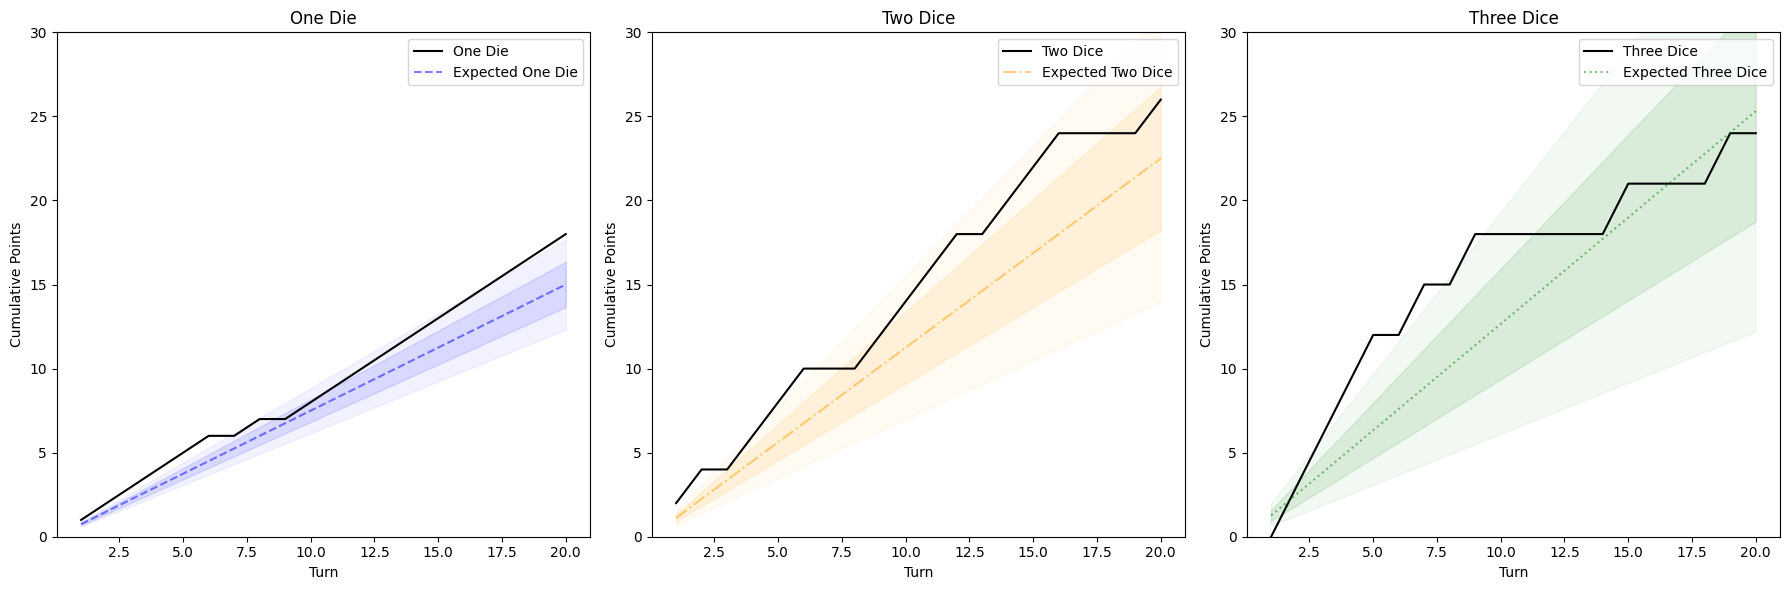

In [339]:
# Extract the values for ppt1, ppt2, and ppt3
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate the mean
mean_ppt1 = np.mean(ppt1)
mean_ppt2 = np.mean(ppt2)
mean_ppt3 = np.mean(ppt3)

# Calculate the variance
variance_ppt1 = np.mean((ppt1 - mean_ppt1) ** 2)
variance_ppt2 = np.mean((ppt2 - mean_ppt2) ** 2)
variance_ppt3 = np.mean((ppt3 - mean_ppt3) ** 2)

# Calculate the standard deviation
std_dev_ppt1 = np.sqrt(variance_ppt1)
std_dev_ppt2 = np.sqrt(variance_ppt2)
std_dev_ppt3 = np.sqrt(variance_ppt3)

# Calculate the standard error of the mean
sem_ppt1 = std_dev_ppt1 / np.sqrt(n)
sem_ppt2 = std_dev_ppt2 / np.sqrt(n)
sem_ppt3 = std_dev_ppt3 / np.sqrt(n)

# Generate x values
x = np.arange(1, n + 1)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for One Die
axs[0].plot(x, np.cumsum(ppt1), label='One Die', color='black')
axs[0].plot(x, FOPHexpected_value_one_roll * x, 'b--', label='Expected One Die', alpha=0.5)
axs[0].fill_between(x, np.maximum((FOPHexpected_value_one_roll - sem_ppt1) * x, 0), (FOPHexpected_value_one_roll + sem_ppt1) * x, color='blue', alpha=0.1)
axs[0].fill_between(x, np.maximum((FOPHexpected_value_one_roll - 2 * sem_ppt1) * x, 0), (FOPHexpected_value_one_roll + 2 * sem_ppt1) * x, color='blue', alpha=0.05)
axs[0].set_ylim(0, n * 1.5)
axs[0].set_xlabel('Turn')
axs[0].set_ylabel('Cumulative Points')
axs[0].legend()
axs[0].set_title('One Die')

# Plot for Two Dice
axs[1].plot(x, np.cumsum(ppt2), label='Two Dice', color='black')
axs[1].plot(x, FOPHexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Dice', alpha=0.5)
axs[1].fill_between(x, np.maximum((FOPHexpected_value_two_rolls - sem_ppt2) * x, 0), (FOPHexpected_value_two_rolls + sem_ppt2) * x, color='orange', alpha=0.1)
axs[1].fill_between(x, np.maximum((FOPHexpected_value_two_rolls - 2 * sem_ppt2) * x, 0), (FOPHexpected_value_two_rolls + 2 * sem_ppt2) * x, color='orange', alpha=0.05)
axs[1].set_ylim(0, n * 1.5)
axs[1].set_xlabel('Turn')
axs[1].set_ylabel('Cumulative Points')
axs[1].legend()
axs[1].set_title('Two Dice')

# Plot for Three Dice
axs[2].plot(x, np.cumsum(ppt3), label='Three Dice', color='black')
axs[2].plot(x, FOPHexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Dice', alpha=0.5)
axs[2].fill_between(x, np.maximum((FOPHexpected_value_three_rolls - sem_ppt3) * x, 0), (FOPHexpected_value_three_rolls + sem_ppt3) * x, color='green', alpha=0.1)
axs[2].fill_between(x, np.maximum((FOPHexpected_value_three_rolls - 2 * sem_ppt3) * x, 0), (FOPHexpected_value_three_rolls + 2 * sem_ppt3) * x, color='green', alpha=0.05)
axs[2].set_ylim(0, n * 1.5)
axs[2].set_xlabel('Turn')
axs[2].set_ylabel('Cumulative Points')
axs[2].legend()
axs[2].set_title('Three Dice')

plt.tight_layout()
plt.show()

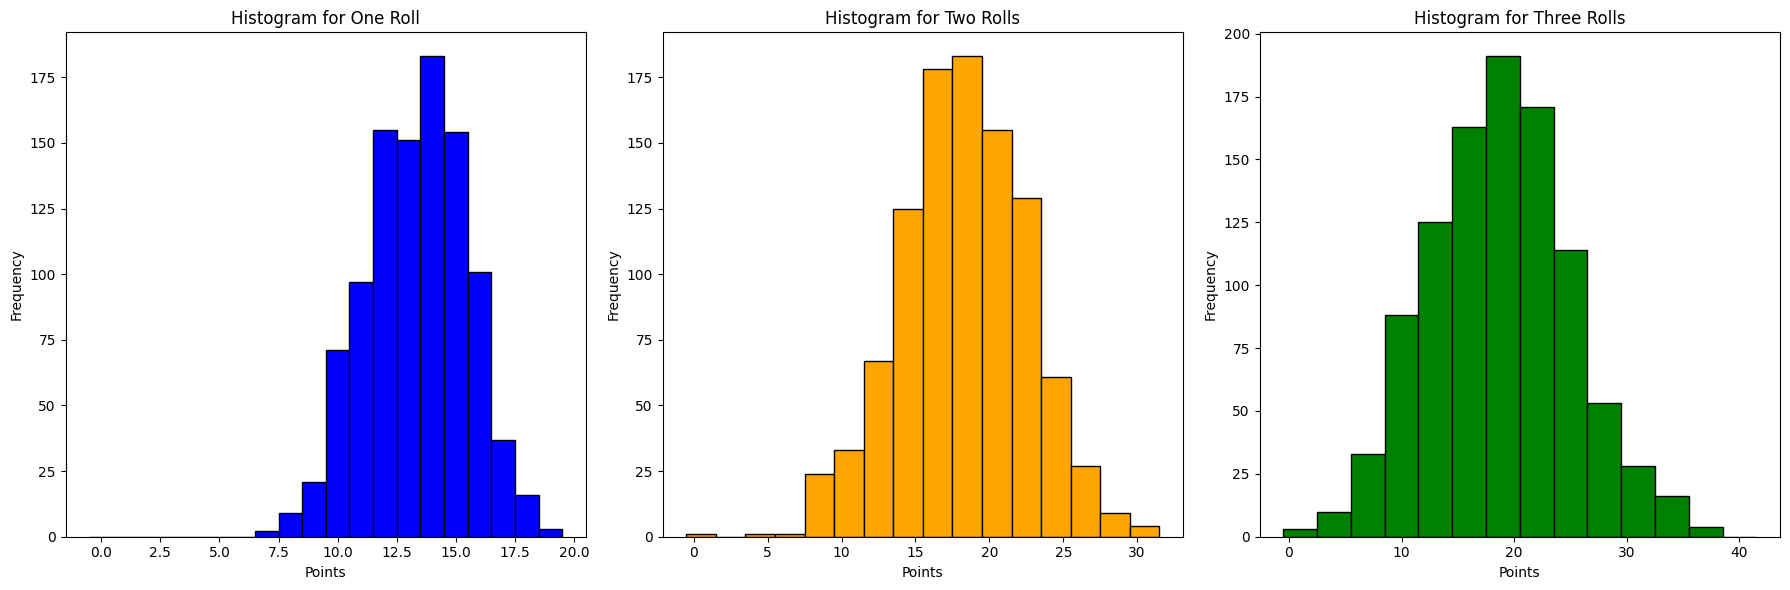

In [340]:
pptArr = []
for i in range(0, nHist):
    means = []
    sumOneRoll = 0
    sumTwoRoll = 0
    sumThreeRoll = 0
    pointsPerTurn = []
    for j in range(0, n):
        randomNum = random.randint(1,6)
        ppt1 = 0
        if randomNum < 5:
            sumOneRoll += 1
            ppt1 = 1

        randomNum = random.randint(1,6)
        ppt2 = 0
        if randomNum < 5:
            randomNum = random.randint(1,6)
            if randomNum < 5:
                sumTwoRoll += 2
                ppt2 = 2

        randomNum = random.randint(1,6)
        ppt3 = 0
        if randomNum < 5:
            randomNum = random.randint(1,6)
            if randomNum < 5:
                randomNum = random.randint(1,6)
                if randomNum < 5:
                    sumThreeRoll += 3
                    ppt3 = 3

    pptArr.append({
        'sumOneRoll': sumOneRoll,
        'sumTwoRoll': sumTwoRoll,
        'sumThreeRoll': sumThreeRoll
    })

# Extract the sums for each roll
sumOneRolls = [p['sumOneRoll'] for p in pptArr]
sumTwoRolls = [p['sumTwoRoll'] for p in pptArr]
sumThreeRolls = [p['sumThreeRoll'] for p in pptArr]

# Create histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for One Roll
axs[0].hist(sumOneRolls, bins=np.arange(-0.5, max(sumOneRolls) + 1.5, 1), edgecolor='black', align='mid', color='blue')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for One Roll')

# Histogram for Two Rolls
axs[1].hist(sumTwoRolls, bins=np.arange(-0.5, max(sumTwoRolls) + 1.5, 2), edgecolor='black', align='mid', color='orange')
axs[1].set_xlabel('Points')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for Two Rolls')

# Histogram for Three Rolls
axs[2].hist(sumThreeRolls, bins=np.arange(-0.5, max(sumThreeRolls) + 1.5, 3), edgecolor='black', align='mid', color='green')
axs[2].set_xlabel('Points')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram for Three Rolls')

plt.tight_layout()
plt.show()

# Law of Large Numbers

![Brahminy Kite](https://cdn.discordapp.com/attachments/551174213663326254/1318485398766489631/image.png?ex=67627eb7&is=67612d37&hm=75dee7858e5d47eaded3d9785bb6afcbd4cfc74a2f9c4b6bb072c5fcad37c5c9&)

Now I need to prove that my math is actually correct. To show if the odds are correct I am going to increase the amount of times things are done. I will take a look at the Brahminy Kite again but with 20000 turns.

Having 20000 turns we can see that each line follows their expected fairly closely. Each of the observed points is at most 0.01 off of what was expected. Any luck that happens over those 20000 turns gets evened out with the opposite luck. This shows that the numbers are correct (as long as my code is trustworthy).

In [349]:
largeMult = 1000

means = []
sumOneRoll = 0
sumTwoRoll = 0
sumThreeRoll = 0
pointsPerTurn = []

for j in range(0, n*largeMult):
    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    randomNum3 = random.randint(1,6)
    ppt1 = 0
    if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
        sumOneRoll += 1
        ppt1 = 1

    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    randomNum3 = random.randint(1,6)
    ppt2 = 0
    if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            sumTwoRoll += 2
            ppt2 = 2

    randomNum1 = random.randint(1,6)
    randomNum2 = random.randint(1,6)
    randomNum3 = random.randint(1,6)
    ppt3 = 0
    if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            randomNum3 = random.randint(1,6)
            if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                sumThreeRoll += 3
                ppt3 = 3

    pointsPerTurn.append({
        'ppt1': ppt1,
        'ppt2': ppt2,
        'ppt3': ppt3
    })

means.append({
    'sumOneRoll': sumOneRoll / (n*largeMult),
    'sumTwoRoll': sumTwoRoll / (n*largeMult),
    'sumThreeRoll': sumThreeRoll / (n*largeMult)
})

print(means)

[{'sumOneRoll': 0.701, 'sumTwoRoll': 0.9879, 'sumThreeRoll': 1.05135}]


## One Roll
$$\left(\frac{2}{6}+\frac{4}{6}\times\frac{2}{6}+\frac{4}{6}\times\frac{4}{6}\times\frac{2}{6}\right) = 0.703 \text{ expected points}$$

## Two Rolls
$$\left(\frac{2}{6}+\frac{4}{6}\times\frac{2}{6}+\frac{4}{6}\times\frac{4}{6}\times\frac{2}{6}\right)^{2}\times2 = 0.99 \text{ expected points}$$

## Three Rolls
$$\left(\frac{2}{6}+\frac{4}{6}\times\frac{2}{6}+\frac{4}{6}\times\frac{4}{6}\times\frac{2}{6}\right)^{3}\times3 = 1.045 \text{ expected points}$$


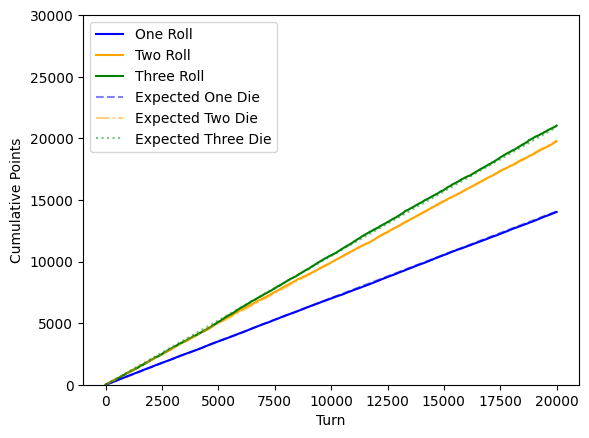

In [350]:
# Convert list of dictionaries to a NumPy array for efficient operations
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate cumulative sums
cumsum_ppt1 = np.cumsum(ppt1)
cumsum_ppt2 = np.cumsum(ppt2)
cumsum_ppt3 = np.cumsum(ppt3)

# Expected values
BKexpected_value_one_roll = (2/6+4/6*2/6+4/6*4/6*2/6)
BKexpected_value_two_rolls = (2/6+4/6*2/6+4/6*4/6*2/6)**2*2
BKexpected_value_three_rolls = (2/6+4/6*2/6+4/6*4/6*2/6)**3*3

# Generate x values
x = np.arange(1, len(pointsPerTurn) + 1)

# Plot the data
plt.plot(x, cumsum_ppt1, label='One Roll', color='blue')
plt.plot(x, cumsum_ppt2, label='Two Roll', color='orange')
plt.plot(x, cumsum_ppt3, label='Three Roll', color='green')

plt.plot(x, BKexpected_value_one_roll * x, 'blue', linestyle='--', label='Expected One Die', alpha=0.5)
plt.plot(x, BKexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Die', alpha=0.5)
plt.plot(x, BKexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Die', alpha=0.5)

plt.ylim(0, n*largeMult * 1.5)
plt.xlabel('Turn')
plt.ylabel('Cumulative Points')
plt.legend()
plt.show()

| Number of Rolls | Expected Points | Observed Points |
|--|--|--|
| One Roll | 0.703 | 0.701 |
| Two Rolls | 0.99 | 0.987 |
| Three Rolls | 1.045 | 1.051 |

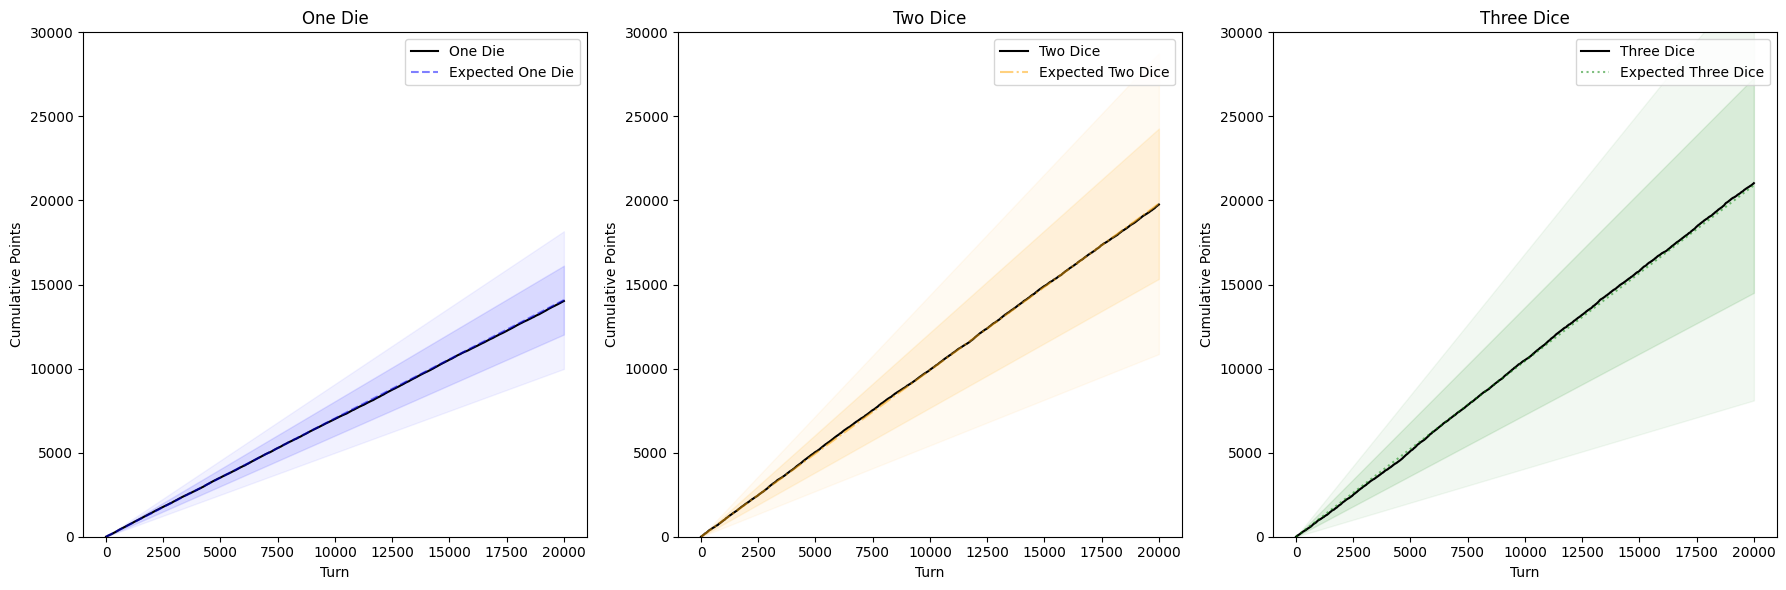

In [351]:
# Extract the values for ppt1, ppt2, and ppt3
ppt1 = np.array([p['ppt1'] for p in pointsPerTurn])
ppt2 = np.array([p['ppt2'] for p in pointsPerTurn])
ppt3 = np.array([p['ppt3'] for p in pointsPerTurn])

# Calculate the mean
mean_ppt1 = np.mean(ppt1)
mean_ppt2 = np.mean(ppt2)
mean_ppt3 = np.mean(ppt3)

# Calculate the variance
variance_ppt1 = np.mean((ppt1 - mean_ppt1) ** 2)
variance_ppt2 = np.mean((ppt2 - mean_ppt2) ** 2)
variance_ppt3 = np.mean((ppt3 - mean_ppt3) ** 2)

# Calculate the standard deviation
std_dev_ppt1 = np.sqrt(variance_ppt1)
std_dev_ppt2 = np.sqrt(variance_ppt2)
std_dev_ppt3 = np.sqrt(variance_ppt3)

# Calculate the standard error of the mean
sem_ppt1 = std_dev_ppt1 / np.sqrt(n)
sem_ppt2 = std_dev_ppt2 / np.sqrt(n)
sem_ppt3 = std_dev_ppt3 / np.sqrt(n)

# Generate x values
x = np.arange(1, n*largeMult + 1)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for One Die
axs[0].plot(x, np.cumsum(ppt1), label='One Die', color='black')
axs[0].plot(x, BKexpected_value_one_roll * x, 'b--', label='Expected One Die', alpha=0.5)
axs[0].fill_between(x, np.maximum((BKexpected_value_one_roll - sem_ppt1) * x, 0), (BKexpected_value_one_roll + sem_ppt1) * x, color='blue', alpha=0.1)
axs[0].fill_between(x, np.maximum((BKexpected_value_one_roll - 2 * sem_ppt1) * x, 0), (BKexpected_value_one_roll + 2 * sem_ppt1) * x, color='blue', alpha=0.05)
axs[0].set_ylim(0, n*largeMult * 1.5)
axs[0].set_xlabel('Turn')
axs[0].set_ylabel('Cumulative Points')
axs[0].legend()
axs[0].set_title('One Die')

# Plot for Two Dice
axs[1].plot(x, np.cumsum(ppt2), label='Two Dice', color='black')
axs[1].plot(x, BKexpected_value_two_rolls * x, 'orange', linestyle='-.', label='Expected Two Dice', alpha=0.5)
axs[1].fill_between(x, np.maximum((BKexpected_value_two_rolls - sem_ppt2) * x, 0), (BKexpected_value_two_rolls + sem_ppt2) * x, color='orange', alpha=0.1)
axs[1].fill_between(x, np.maximum((BKexpected_value_two_rolls - 2 * sem_ppt2) * x, 0), (BKexpected_value_two_rolls + 2 * sem_ppt2) * x, color='orange', alpha=0.05)
axs[1].set_ylim(0, n*largeMult * 1.5)
axs[1].set_xlabel('Turn')
axs[1].set_ylabel('Cumulative Points')
axs[1].legend()
axs[1].set_title('Two Dice')

# Plot for Three Dice
axs[2].plot(x, np.cumsum(ppt3), label='Three Dice', color='black')
axs[2].plot(x, BKexpected_value_three_rolls * x, 'green', linestyle=':', label='Expected Three Dice', alpha=0.5)
axs[2].fill_between(x, np.maximum((BKexpected_value_three_rolls - sem_ppt3) * x, 0), (BKexpected_value_three_rolls + sem_ppt3) * x, color='green', alpha=0.1)
axs[2].fill_between(x, np.maximum((BKexpected_value_three_rolls - 2 * sem_ppt3) * x, 0), (BKexpected_value_three_rolls + 2 * sem_ppt3) * x, color='green', alpha=0.05)
axs[2].set_ylim(0, n*largeMult * 1.5)
axs[2].set_xlabel('Turn')
axs[2].set_ylabel('Cumulative Points')
axs[2].legend()
axs[2].set_title('Three Dice')

plt.tight_layout()
plt.show()

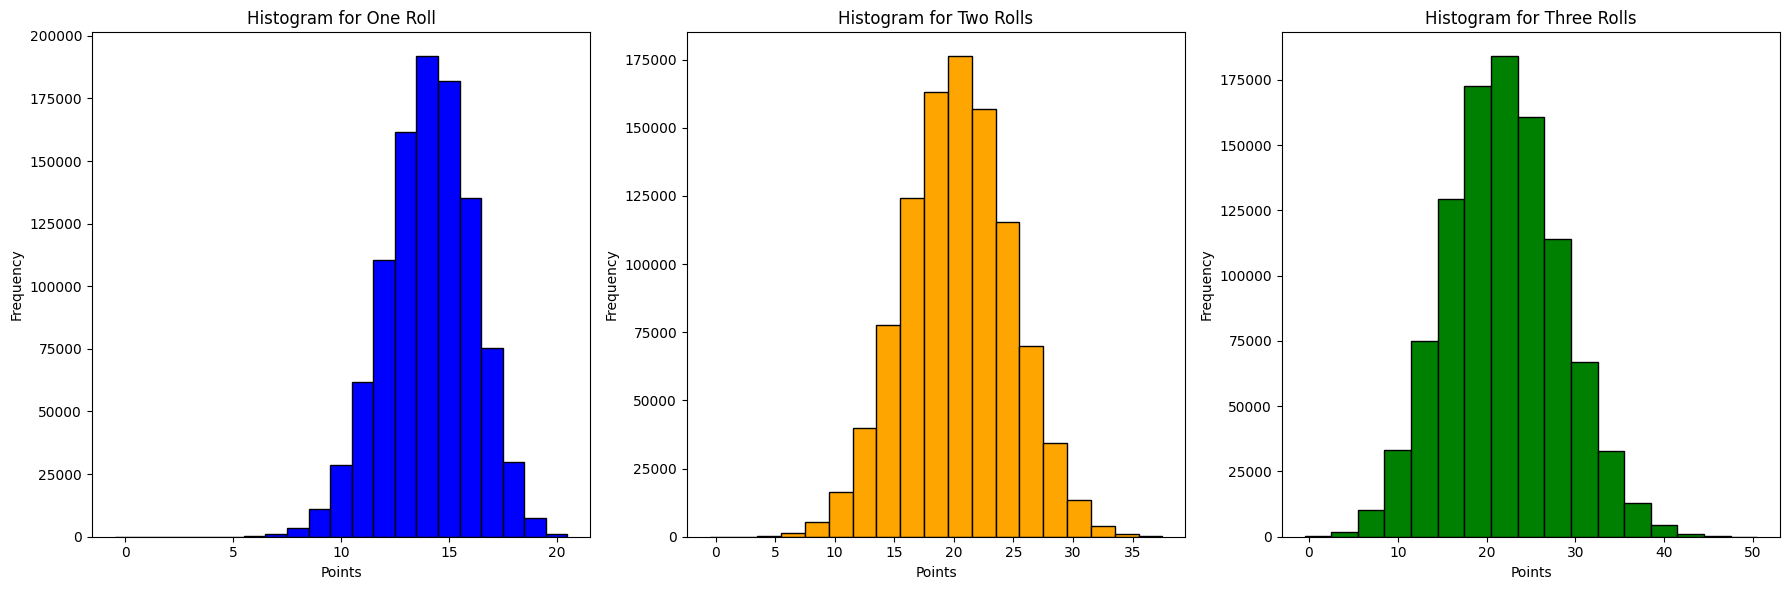

In [352]:
pptArr = []

for i in range(0, nHist*largeMult):

    means = []
    sumOneRoll = 0
    sumTwoRoll = 0
    sumThreeRoll = 0
    pointsPerTurn = []
    for j in range(0, n):
        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        ppt1 = 0
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            sumOneRoll += 1
            ppt1 = 1

        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        ppt2 = 0
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            randomNum3 = random.randint(1,6)
            if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                sumTwoRoll += 2
                ppt2 = 2

        randomNum1 = random.randint(1,6)
        randomNum2 = random.randint(1,6)
        randomNum3 = random.randint(1,6)
        ppt3 = 0
        if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
            randomNum1 = random.randint(1,6)
            randomNum2 = random.randint(1,6)
            randomNum3 = random.randint(1,6)
            if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                randomNum1 = random.randint(1,6)
                randomNum2 = random.randint(1,6)
                randomNum3 = random.randint(1,6)
                if randomNum1 < 3 or randomNum2 < 3 or randomNum3 < 3:
                    sumThreeRoll += 3
                    ppt3 = 3

    pptArr.append({
        'sumOneRoll': sumOneRoll,
        'sumTwoRoll': sumTwoRoll,
        'sumThreeRoll': sumThreeRoll
    })

# Extract the sums for each roll
sumOneRolls = [p['sumOneRoll'] for p in pptArr]
sumTwoRolls = [p['sumTwoRoll'] for p in pptArr]
sumThreeRolls = [p['sumThreeRoll'] for p in pptArr]

# Create histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for One Roll
axs[0].hist(sumOneRolls, bins=np.arange(-0.5, max(sumOneRolls) + 1.5, 1), edgecolor='black', align='mid', color='blue')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for One Roll')

# Histogram for Two Rolls
axs[1].hist(sumTwoRolls, bins=np.arange(-0.5, max(sumTwoRolls) + 1.5, 2), edgecolor='black', align='mid', color='orange')
axs[1].set_xlabel('Points')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for Two Rolls')

# Histogram for Three Rolls
axs[2].hist(sumThreeRolls, bins=np.arange(-0.5, max(sumThreeRolls) + 1.5, 3), edgecolor='black', align='mid', color='green')
axs[2].set_xlabel('Points')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram for Three Rolls')

plt.tight_layout()
plt.show()

## Which One is Best?
To find out which one is best I am going to assume each resource is worth about 1 point. This means a food, eggs, and cards are all worth 1 point. A quick recap of each bird:
- White-Throated Kingfisher: costs 2, 3 points
- Brahminy Kite: costs 3, 6 points
- Forest Owlet: costs 2, 4 points
- Purple Heron: costs 1, 2 points

We can see that Brahminy Kite starts in the lead as it is worth the most points. The White-Throated Kingfisher is not worth much and then by turn 3 drops lower than the Forest Owlet. The Brahminy Kite keeps it's lead until turn 9 where it gets taken by the Purple Heron, and then at turn 14 it gets passed by the Forest Owlet. This graph shows a fairly close race which is good news for each bird here.

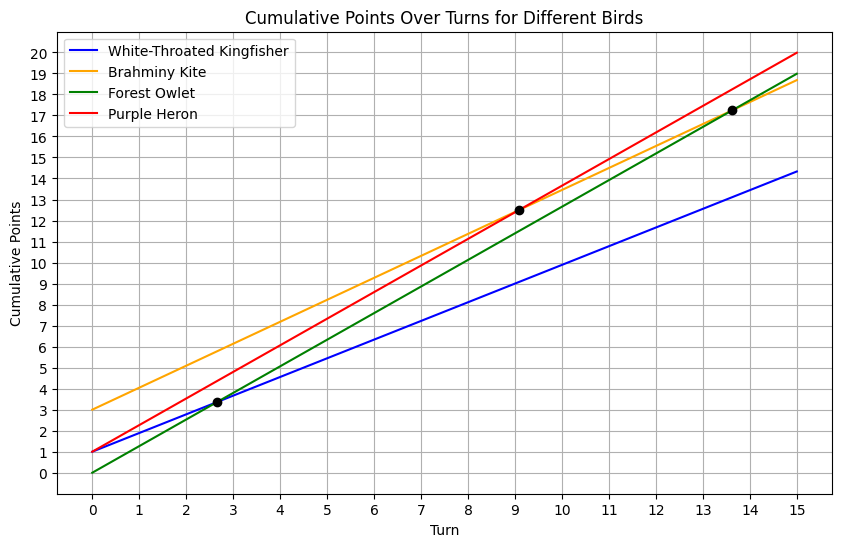

In [364]:
#White-Throated Kingfisher
WTKCost = 2
WTKPoints = 3
WTKStart = WTKPoints - WTKCost

BKCost = 3
BKPoints = 6
BKStart = BKPoints - BKCost

FOCost = 2
FOPoints = 2
FOStart = FOPoints - FOCost

PHCost = 1
PHPoints = 2
PHStart = PHPoints - PHCost

# Generate x values (turns)
turns = np.arange(0, 16)

# Calculate the y values for each bird
WTK_y = WTKStart + WTKexpected_value_three_rolls * turns
BK_y = BKStart + BKexpected_value_three_rolls * turns
FO_y = FOStart + FOPHexpected_value_three_rolls * turns
PH_y = PHStart + FOPHexpected_value_three_rolls * turns

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(turns, WTK_y, label='White-Throated Kingfisher', color='blue')
plt.plot(turns, BK_y, label='Brahminy Kite', color='orange')
plt.plot(turns, FO_y, label='Forest Owlet', color='green')
plt.plot(turns, PH_y, label='Purple Heron', color='red')

# Function to find the intersection of two line segments
def find_intersections(x, y1, y2):
    intersections = []
    for i in range(1, len(x)):
        if (y1[i-1] - y2[i-1]) * (y1[i] - y2[i]) < 0:
            # Linear interpolation to find the intersection point
            x_intersect = x[i-1] + (x[i] - x[i-1]) * (y2[i-1] - y1[i-1]) / ((y1[i] - y1[i-1]) - (y2[i] - y2[i-1]))
            y_intersect = y1[i-1] + (y1[i] - y1[i-1]) * (x_intersect - x[i-1]) / (x[i] - x[i-1])
            intersections.append((x_intersect, y_intersect))
    return intersections

# Find intersections
intersections = []
intersections += find_intersections(turns, WTK_y, BK_y)
intersections += find_intersections(turns, WTK_y, FO_y)
intersections += find_intersections(turns, WTK_y, PH_y)
intersections += find_intersections(turns, BK_y, FO_y)
intersections += find_intersections(turns, BK_y, PH_y)
intersections += find_intersections(turns, FO_y, PH_y)

for x, y in intersections:
    plt.plot(x, y, 'ko')  # 'ko' means black color and circle marker

# Add ticks for each turn
plt.xticks(turns)

max_points = max(max(WTK_y), max(BK_y), max(FO_y), max(PH_y))
plt.yticks(np.arange(0, max_points + 1, 1))

# Add gridlines
plt.grid(True)

plt.xlabel('Turn')
plt.ylabel('Cumulative Points')
plt.legend()
plt.title('Cumulative Points Over Turns for Different Birds')
plt.show()


# Conclusion

There is a reason I called these birds "Gambling Birds". If you want to use them, use them early to try alleviate some of the randomness and go for multiple rolls. It is important to get them early and in a lane that will be activated plenty of times to get the most out of each bird. 
To cap it all off, risk it for at least 2 rolls.